In [1]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np


In [2]:
data = pd.read_csv('data/iris.csv')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Splitting data into training / test allows me to test the accuracy of my model on unseend data.

this split is random however to mainatin class raitios i have used stratisfied sampling.

random state = 1 allows randomisation to remain deterministic, this ensures that test data dos not bleed into the training data

In [3]:
X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.55, stratify=y, random_state=1)
print(X_train.shape, y_train.shape)


(67, 4) (67,)


In [4]:
clf = MLPClassifier(random_state=1, max_iter=700,
                    activation="relu",
                    hidden_layer_sizes=(100, 100, 100, 100,
                                        100, 100, 100, 100, 100),
                    verbose=True).fit(X_train, y_train)




Iteration 1, loss = 1.11970364
Iteration 2, loss = 1.09158853
Iteration 3, loss = 1.06704169
Iteration 4, loss = 1.04703784
Iteration 5, loss = 1.01883881
Iteration 6, loss = 0.98812091
Iteration 7, loss = 0.95193849
Iteration 8, loss = 0.90964687
Iteration 9, loss = 0.86183134
Iteration 10, loss = 0.81418207
Iteration 11, loss = 0.76434234
Iteration 12, loss = 0.71308427
Iteration 13, loss = 0.65991584
Iteration 14, loss = 0.60525758
Iteration 15, loss = 0.54786663
Iteration 16, loss = 0.48919097
Iteration 17, loss = 0.43347232
Iteration 18, loss = 0.38034287
Iteration 19, loss = 0.32738183
Iteration 20, loss = 0.27744724
Iteration 21, loss = 0.23261713
Iteration 22, loss = 0.20811938
Iteration 23, loss = 0.24705856
Iteration 24, loss = 0.16506926
Iteration 25, loss = 0.17168432
Iteration 26, loss = 0.15825810
Iteration 27, loss = 0.13857320
Iteration 28, loss = 0.13570520
Iteration 29, loss = 0.11204066
Iteration 30, loss = 0.12126885
Iteration 31, loss = 0.10844569
Iteration 32, los

Multiclass classification requires One verses Rest in order to compare ROC_AUC 

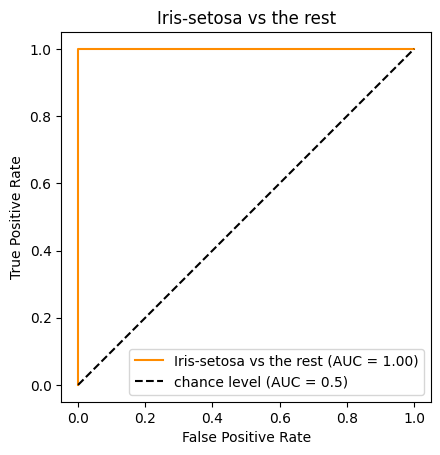

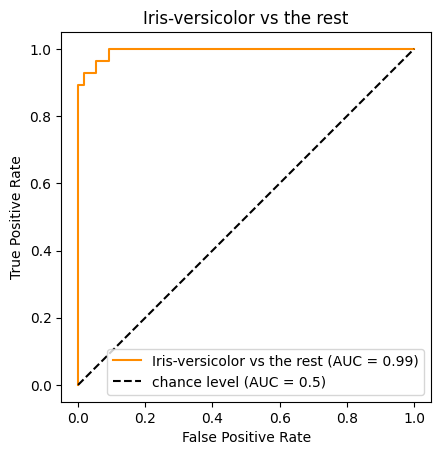

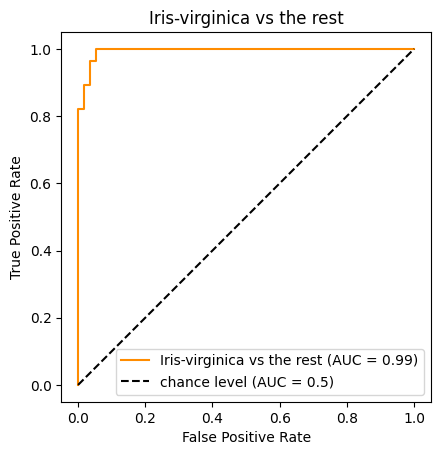

In [5]:

from sklearn.preprocessing import LabelBinarizer

y_score = clf.predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

for class_of_interest in label_binarizer.classes_:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} vs the rest",
        color="darkorange",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{class_of_interest} vs the rest")
    plt.legend()
    plt.show()


In [6]:
import pickle

filename = "models/iris-nn.pickle"
pickle.dump(clf, open(filename, "wb"))
